In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns


In [2]:
df = pd.read_csv("Divorce.csv") 

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
df.shape

(170, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [6]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [7]:
# check for any null values
null = df.isna().sum()
null

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [8]:
#Correlation function
corr = df.corr(numeric_only = True)

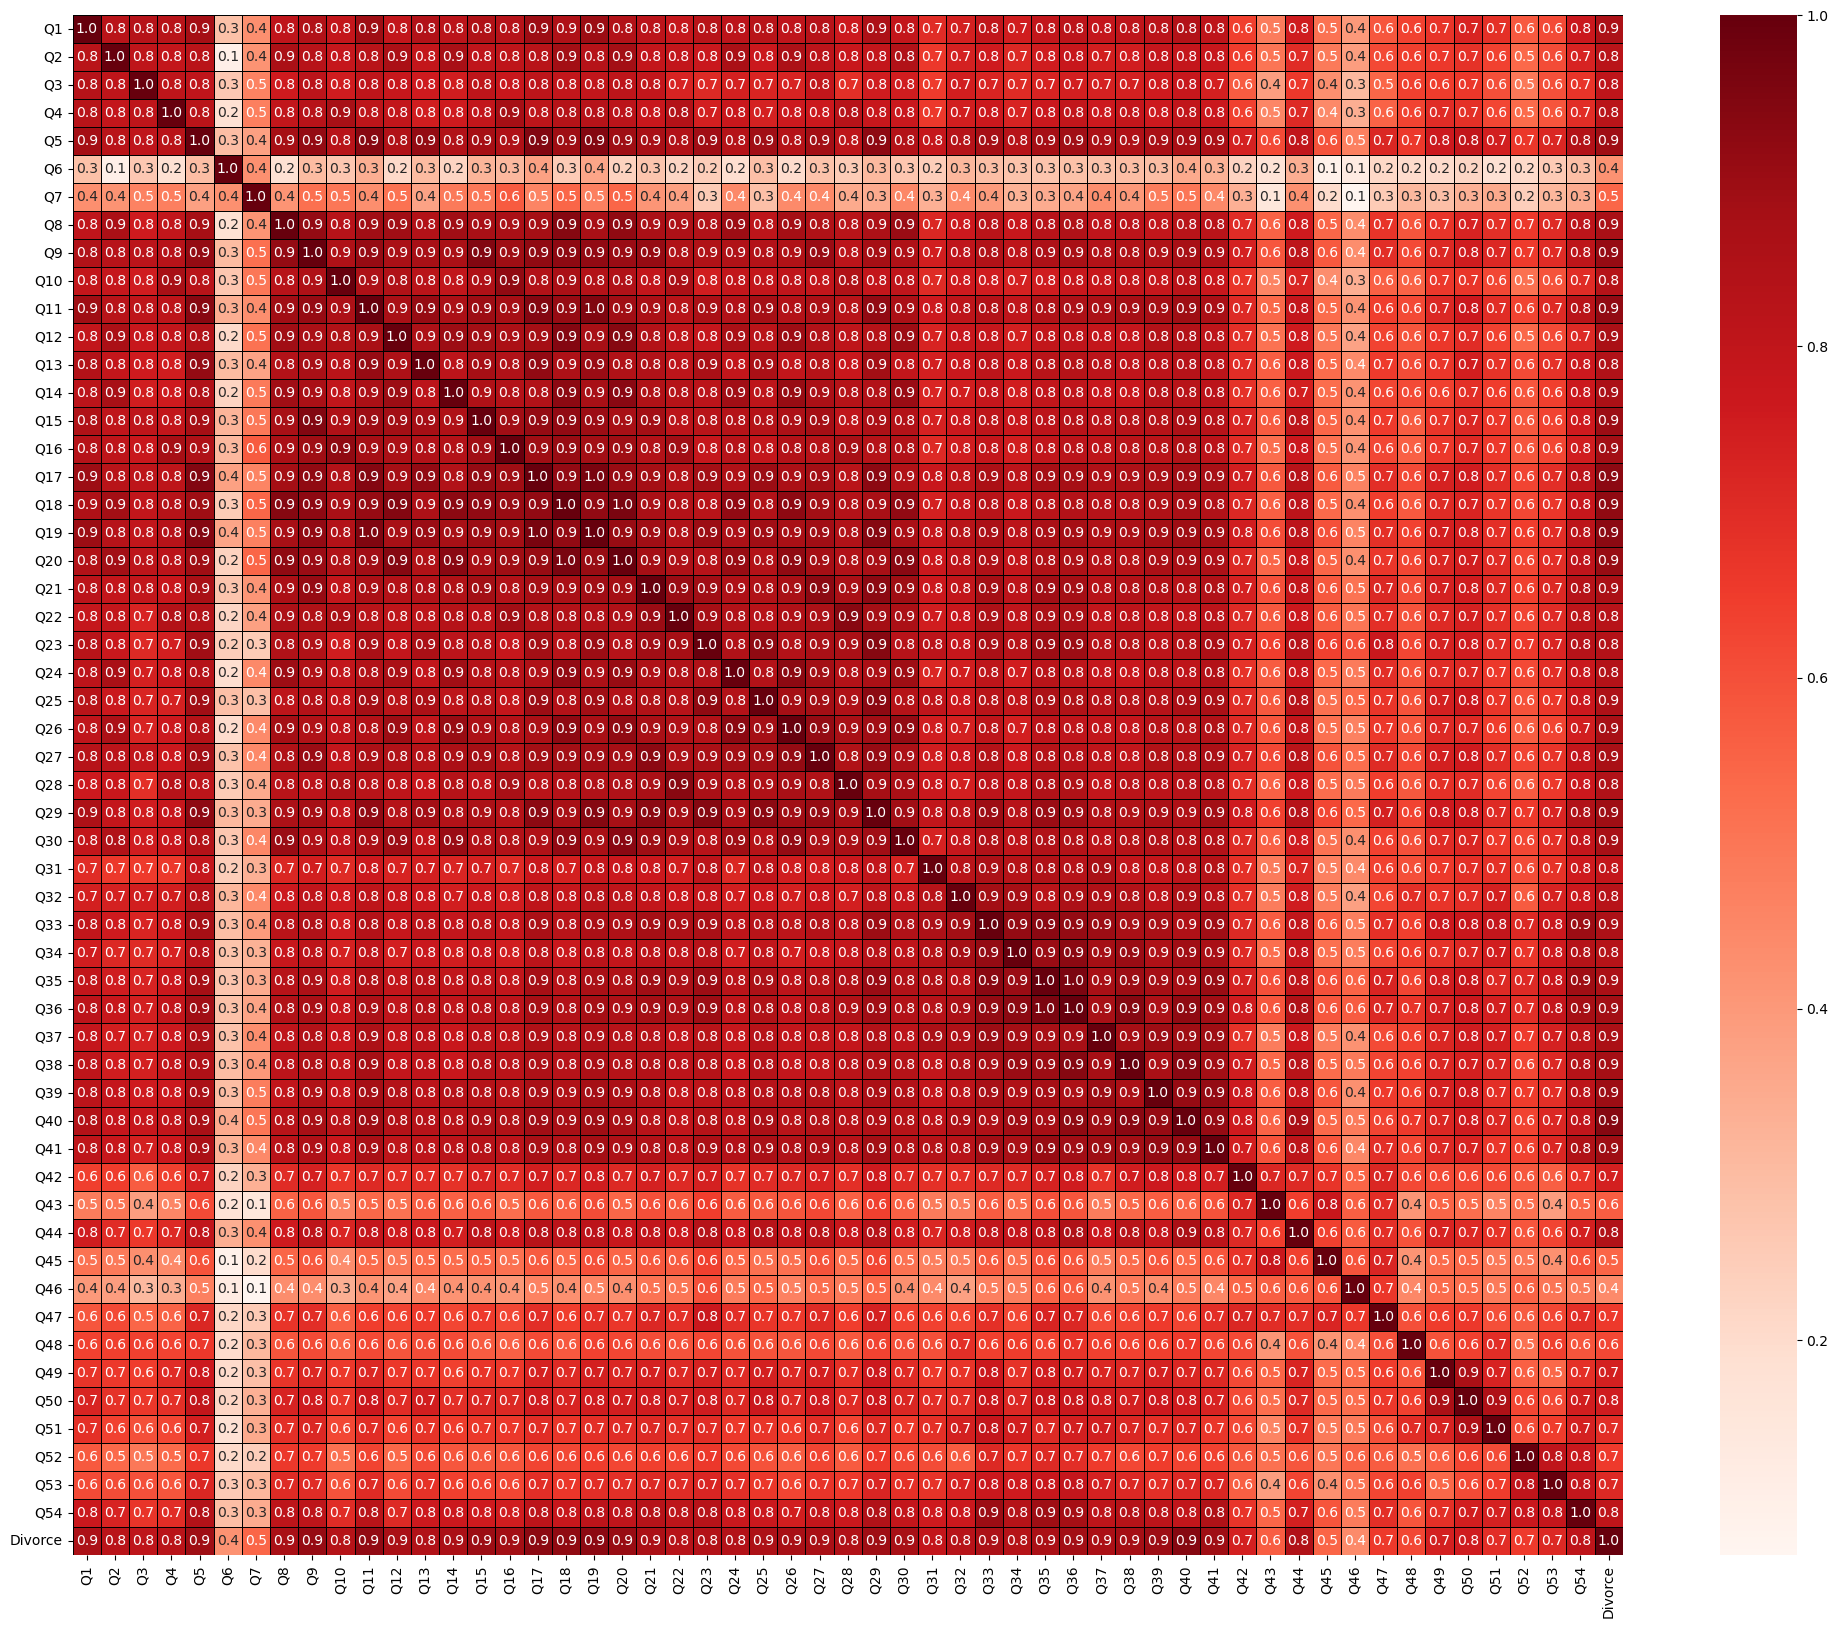

In [9]:
#Heat Map representing the correlation between dependent and independent 
#values where we could see that Q6 and Q7 did not have any significant 
#correlation with the other independent nor dependent variable.
f,ax = plt.subplots(figsize=(25, 20))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.1f',cmap='Reds',ax=ax)
plt.show()

In [10]:
#After visualizing the heatmap we can do some fitting 
#techniques droping the columns Q6,Q17,Q45 and Q46
columns_drop = ['Q6','Q7',]
df = df.drop(columns = columns_drop)

In [11]:
#Split and set the data into train, valid and test by 60%, 20% and 20% respectively 
train, valid, test = np.split(df.sample(frac=1), (int(0.6*len(df)),int(0.8*len(df))))

In [12]:
print(len(train[train["Divorce"]==1])) #Divorced
print(len(train[train["Divorce"]==0])) #Married 

51
51


In [13]:
#Create a function, difine and set x with the 
#independent values and y as the independent value
#Transform and fit x
def scale_dataset(dataframe):
    scaler = StandardScaler()
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    x_scaled = scaler.fit_transform(x)
    return x_scaled, y, scaler

In [14]:
#Defining our X and Y train, valid, and test datasets
x_train, y_train, scaler_train = scale_dataset(train)
x_valid, y_valid, _ = scale_dataset(valid)  
x_test, y_test, _ = scale_dataset(test)  

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [38]:
#Creating a K-Neighbors model with a closter of 3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
#Predicting Y values using the K-neighbors function
y_pred = knn_model.predict(x_test)

In [40]:
#Printing the classification report of the K-neighbors 
#where we can conclude that the test is accurate and significant
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [19]:
# Evaluating the model on the validation set
y_valid_pred = knn_model.predict(x_valid)
print("Validation Set:")
print(classification_report(y_valid, y_valid_pred))

# Evaluating the model on the test set
y_test_pred = knn_model.predict(x_test)
print("Test Set:")
print(classification_report(y_test, y_test_pred))

Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        16

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Test Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [20]:
#Accuracy of the training model
train_accuracy = knn_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9705882352941176


# Logistic Regression


In [21]:
#Creating the logistic regression model
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(x_train, y_train)
log_pred = logic.predict(x_test)

In [22]:
#Accuracy and confusion matrix
print(classification_report(y_test, log_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, log_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

[[17  0]
 [ 0 17]]


In [23]:
# Mean Squeared error to find the distance between the predictions and the actual values.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, log_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [24]:
#Finding the coefficient and intercept from the model and rewritting the equation
coefficients = logic.coef_
intercept = logic.intercept_
equation = "y = " + " + ".join([f"{coeff:.2f} * x{i}" for i, coeff in enumerate(coefficients[0])]) + f" + {intercept[0]:.2f}"

In [25]:
print(equation)

y = 0.31 * x0 + 0.42 * x1 + 0.43 * x2 + 0.12 * x3 + 0.11 * x4 + -0.04 * x5 + -0.01 * x6 + -0.13 * x7 + 0.05 * x8 + 0.26 * x9 + 0.00 * x10 + 0.17 * x11 + 0.34 * x12 + 0.22 * x13 + 0.39 * x14 + 0.30 * x15 + 0.27 * x16 + 0.43 * x17 + 0.12 * x18 + -0.02 * x19 + 0.00 * x20 + -0.13 * x21 + 0.16 * x22 + 0.59 * x23 + 0.11 * x24 + 0.35 * x25 + 0.16 * x26 + 0.24 * x27 + 0.51 * x28 + 0.20 * x29 + 0.26 * x30 + 0.23 * x31 + 0.10 * x32 + 0.23 * x33 + 0.10 * x34 + 0.23 * x35 + 0.34 * x36 + 0.64 * x37 + 0.25 * x38 + 0.18 * x39 + 0.17 * x40 + 0.41 * x41 + -0.01 * x42 + 0.06 * x43 + 0.12 * x44 + -0.17 * x45 + 0.50 * x46 + 0.19 * x47 + -0.05 * x48 + 0.20 * x49 + 0.26 * x50 + -0.18 * x51 + 3.96


# LINEAR REGRESSION

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
#Generating the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [28]:
# Dependent predicted values using the linear regression model
y_pred = linear_reg_model.predict(x_test)

In [29]:
# Mean Squeared error to find the distance between the predictions and the actual values.
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03130206020261032


In [30]:
#Finding the coefficient and intercept from the model
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

In [31]:
# Rewritting the equation as:
equation = "y = " + " + ".join([f"{coeff:.2f} * x{i}" for i, coeff in enumerate(coefficients)]) + f" + {intercept:.2f}"

In [32]:
print(equation)

y = -0.03 * x0 + 0.06 * x1 + -0.01 * x2 + 0.09 * x3 + -0.08 * x4 + -0.04 * x5 + -0.00 * x6 + -0.09 * x7 + 0.09 * x8 + -0.14 * x9 + 0.08 * x10 + 0.01 * x11 + 0.08 * x12 + -0.03 * x13 + 0.30 * x14 + -0.03 * x15 + -0.05 * x16 + 0.02 * x17 + -0.04 * x18 + -0.05 * x19 + 0.01 * x20 + -0.17 * x21 + -0.10 * x22 + 0.19 * x23 + 0.02 * x24 + 0.12 * x25 + -0.13 * x26 + 0.15 * x27 + 0.01 * x28 + 0.01 * x29 + 0.19 * x30 + -0.07 * x31 + -0.12 * x32 + 0.05 * x33 + 0.01 * x34 + -0.01 * x35 + -0.09 * x36 + 0.33 * x37 + 0.03 * x38 + 0.00 * x39 + -0.00 * x40 + -0.02 * x41 + 0.01 * x42 + -0.03 * x43 + 0.05 * x44 + -0.05 * x45 + 0.01 * x46 + 0.04 * x47 + -0.00 * x48 + 0.06 * x49 + 0.02 * x50 + -0.14 * x51 + 0.50


In [33]:
#Generating new values to create an example of the model
new_data =[[3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 3, 4, 4, 0, 1, 3, 3, 3, 1, 0]]

# scale the data using the same information from the training set
new_data_scaled = scaler_train.transform(new_data)
#predict Y results using the linear regression model
predicted_Y = linear_reg_model.predict(new_data_scaled)

print("Predicted Y values:", predicted_Y)

rounded_predicted_Y = round(predicted_Y[0])
print("Rounded Predicted Y value:", rounded_predicted_Y)


Predicted Y values: [0.4771908]
Rounded Predicted Y value: 0


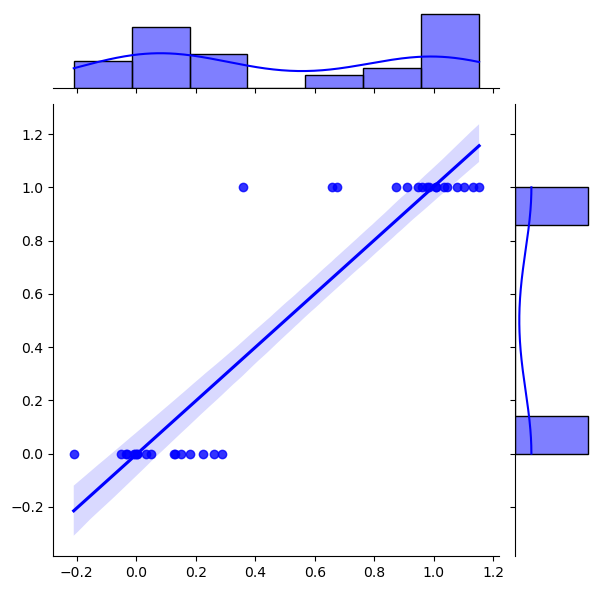

In [37]:
#Linear regression chart 
sns.jointplot(
    x=linear_reg_model.predict(x_test), y=y_test,
    kind='reg',
    color = 'blue',
    ci=95)